#### Problema: desbalance de los datos
##### experimento 1: Undersampling


In [1]:
# Importando librerias necesarias
import numpy as np
import pandas as pd
from pandas import ExcelWriter
import matplotlib.pyplot as plt

In [2]:
D = pd.read_excel("/media/dsg/TOSHIBA EXT/PROYECTO DOCTORADO/XRD_clasificacion_ejercicio.xls", 'manual') #directorio de trabajo
missing_values_count = D.isnull().sum()
missing_values_count



D.info()
# Agrupando variable dependiente en una columna
d1 = D.loc[:, ['Phosphate','Carbonate', 'Silicate', 'Aluminosilicate',  'Other']] 
d1
original_back = d1.idxmax(axis=1)
D['dep_var'] = original_back
D.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Phosphate        522 non-null    bool   
 1   Carbonate        522 non-null    bool   
 2   Silicate         522 non-null    bool   
 3   Aluminosilicate  522 non-null    bool   
 4   Other            522 non-null    bool   
 5   Mg               522 non-null    float64
 6   Al               522 non-null    float64
 7   Si               522 non-null    float64
 8   P                522 non-null    float64
 9   S                522 non-null    float64
 10  Cl               522 non-null    float64
 11  K                522 non-null    float64
 12  Ca               522 non-null    float64
 13  Ti               522 non-null    float64
 14  V                522 non-null    float64
 15  Cr               522 non-null    float64
 16  Fe               522 non-null    float64
 17  Cu              

,Phosphate,Carbonate,Silicate,Aluminosilicate,Other,Mg,Al,Si,P,S,...,Cu,Zn,As,Se,Rb,Sr,Zr,Mo,Ba,dep_var
0,True,False,False,False,False,0.465974,41.267034,4.851036,49.023205,0.186913,...,0.000466,0.000466,0.036322,0.000466,0.000466,0.000466,0.004444,0.000466,0.000466,Phosphate
1,True,False,False,False,False,0.568201,15.892870,42.261745,27.531543,1.234765,...,0.000568,0.000568,0.031473,0.006332,0.000568,0.063097,0.039801,0.004974,0.057428,Phosphate
2,True,False,False,False,False,0.513655,34.848491,6.492888,43.977112,0.180244,...,0.000514,0.000514,0.017003,0.006765,0.000514,0.000514,0.005969,0.000514,0.000514,Phosphate
3,True,False,False,False,False,0.487403,28.638311,14.654716,46.269450,1.065415,...,0.000487,0.000487,0.016784,0.000487,0.000487,0.006842,0.021051,0.005486,0.000487,Phosphate
4,True,False,False,False,False,0.528941,25.362180,16.477864,40.332797,0.934473,...,0.013152,0.000529,0.025486,0.000529,0.000529,0.010504,0.050677,0.009868,0.000529,Phosphate


In [3]:
#Eliminando variables que han sido colapasadas en una sola variable dependiente
datos = D.drop(['Phosphate', 'Carbonate', 'Silicate', 'Aluminosilicate', 'Other'], axis=1)
datos['dep_var'].value_counts()

Phosphate          401
Silicate            39
Carbonate           30
Aluminosilicate     28
Other               24
Name: dep_var, dtype: int64

Phosphate          201
Silicate            19
Carbonate           15
Aluminosilicate     14
Other               12
Name: dep_var, dtype: int64

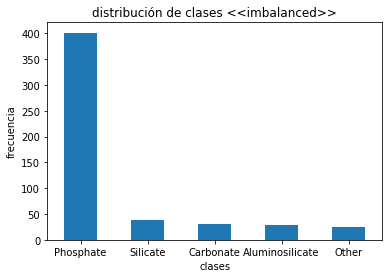

In [32]:
#Importación d elibrerias, arbol de decisión (C4.5) y módulo para división del conjunto de datos
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# División del conjunto de datos x  == variables independientes, y == variable dependiente
x = datos.drop(['dep_var'], axis=1)

y = datos['dep_var']

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.5, random_state=2, stratify=y)


#distribución de clases imbalanced
classimbalan_frecuencia = y.value_counts()

#plot frecuencia clases
classimbalan_frecuencia.plot(kind = 'bar', rot=0 )
plt.title('distribución de clases <<imbalanced>>')

plt.xlabel('clases')
#plt.savefig("/media/dsg/TOSHIBA EXT/MASTER/TFM/caso de estudio/distribución de clases_balanced_kmeans.png")
plt.ylabel('frecuencia')
#print (X_train.shape)
#print (X_test.shape)
#print (y_train.shape)
y_test.value_counts()

(60, 21)
(60, 21)
(60,)
(60,)


Aluminosilicate    17
Phosphate          11
Carbonate          11
Silicate           11
Other              10
Name: dep_var, dtype: int64

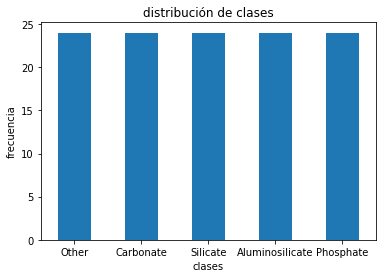

In [33]:
# Libreria para aplicar el remuestro
from imblearn.under_sampling import NearMiss

#Undersampling. 
nm = NearMiss(sampling_strategy='not minority')
x_und, y_und = nm.fit_sample(x, y)

x_und.shape, y_und.shape 

y_und.value_counts()

X_train, X_test, y_train, y_test = train_test_split(x_und, y_und, train_size=0.5, random_state=2)

print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

#Nueva distribución de clases balanceada
classbalan_frecuencia = y_und.value_counts()

#plot frecuencia clases
classbalan_frecuencia.plot(kind = 'bar', rot=0 )
plt.title('distribución de clases')

plt.xlabel('clases')
#plt.savefig("/media/dsg/TOSHIBA EXT/MASTER/TFM/caso de estudio/distribución de clases_balanced_kmeans.png")
plt.ylabel('frecuencia')

y_test.value_counts()


In [34]:
#Precision y  matrices de confusión para diferentes algoritmos
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# knn
knn = KNeighborsClassifier(n_neighbors=4)
knimp = knn.fit(X_train, y_train)
knn.predict(X_test)
print('knn')
resultado_knn = knn.predict(X_test)
print(accuracy_score(y_test, resultado_knn))
knnaccu = accuracy_score(y_test, resultado_knn)
cm = confusion_matrix(y_test,resultado_knn)

print(cm)
print('------')

#bosque aleatorio
modelrf = RandomForestClassifier(n_estimators=1000, class_weight='balanced')
fimp = modelrf.fit(X_train, y_train)
resultado = modelrf.predict(X_test)

print('RF')
print (accuracy_score(y_test, resultado))
cmrf = confusion_matrix(y_test,resultado)
print(cmrf)
rfacc = accuracy_score(y_test, resultado)
resultado_series = pd.Series(resultado)

print('------')

#Árbol de decisión
modeldt = DecisionTreeClassifier()
dtimp = modeldt.fit(X_train, y_train)
resultadodt = modeldt.predict(X_test)
print('C4.5')
cmdt = confusion_matrix(y_test,resultadodt)
dtacc = accuracy_score(y_test, resultadodt)
print(dtacc)
print(cmdt)

print('------')

#regresión logística
logreg = LogisticRegression(max_iter=10000)
log =logreg.fit(X_train, y_train)
resultado_logreg = logreg.predict(X_test)
print('log_reg')
cmlr = confusion_matrix(y_test,resultado_logreg)
lracc = accuracy_score(y_test, resultado_logreg)
print(lracc)
print(cmlr)
print('------')
#SVM
print('svm')
svm = SVC()
svm.fit(X_train, y_train)
resultado_svm = svm.predict(X_test)
svmacc = accuracy_score(y_test, resultado_svm)
cmsvm = confusion_matrix(y_test,resultado_svm)
print(svmacc)
print(cmsvm)
print('------')
#sgd classifier
print ('sthocasitc gradient descendent clasiffier')
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
resultado_sgd = sgd.predict(X_test)
sgdacc = accuracy_score(y_test, resultado_sgd)
cmsgd = confusion_matrix(y_test,resultado_sgd)
print(sgdacc)
print(cmsgd)


#Tabla resumen
acc_alg = pd.DataFrame({"accuracy":[knnaccu, dtacc, rfacc, lracc, svmacc, sgdacc]}, index=["knn", "C4.5", 'RandomF', 'LogRegres', 'svm', 'sgd'])
acc_alg


knn
0.5333333333333333
[[7 1 5 4 0]
 [3 6 0 0 2]
 [0 2 4 4 0]
 [0 0 4 7 0]
 [1 0 0 2 8]]
------
RF
0.5
[[8 1 4 3 1]
 [1 6 1 1 2]
 [1 3 3 2 1]
 [0 0 4 7 0]
 [0 0 2 3 6]]
------
C4.5
0.5166666666666667
[[8 1 2 2 4]
 [0 6 2 1 2]
 [2 4 2 1 1]
 [1 0 3 7 0]
 [1 1 0 1 8]]
------
log_reg
0.36666666666666664
[[6 1 3 5 2]
 [1 5 2 1 2]
 [4 1 2 3 0]
 [1 0 5 5 0]
 [1 1 1 4 4]]
------
svm
0.45
[[0 2 5 7 3]
 [0 7 0 2 2]
 [0 2 5 3 0]
 [0 0 2 9 0]
 [0 2 0 3 6]]
------
sthocasitc gradient descendent clasiffier
0.3333333333333333
[[ 0  1  0 13  3]
 [ 0  4  0  5  2]
 [ 0  0  0  9  1]
 [ 0  0  0 11  0]
 [ 0  1  0  5  5]]


,accuracy
knn,0.533333
C4.5,0.516667
RandomF,0.500000
LogRegres,0.366667
svm,0.450000
sgd,0.333333


Trying different metrics:

Compute precision, recall, F-measure and support for each class

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_true.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support

In [35]:
# different metrics
from sklearn.metrics import classification_report

#knn
y_true = y_test
y_pred = resultado_knn
#target_names = ['silicate', 'carbonate', 'aluminosilicate', 'other', 'phosphate']
print('knn')
print(classification_report(y_true, y_pred))
print('------')

#RF
y_true = y_test
y_pred = resultado
#target_names = ['silicate', 'carbonate', 'aluminosilicate', 'other', 'phosphate']
print('RF')
print(classification_report(y_true, y_pred))
print('------')

# c4.5
y_true = y_test
y_pred = resultadodt
#target_names = ['silicate', 'carbonate', 'aluminosilicate', 'other', 'phosphate']
print('C4.5')
print(classification_report(y_true, y_pred))
print('------')
# reg_log
y_true = y_test
y_pred = resultado_logreg
#target_names = ['silicate', 'carbonate', 'aluminosilicate', 'other', 'phosphate']

print(classification_report(y_true, y_pred))
print('------')
# SVM
y_true = y_test
y_pred = resultado_svm
#target_names = ['silicate', 'carbonate', 'aluminosilicate', 'other', 'phosphate']
print('SVM')
print(classification_report(y_true, y_pred))
print('------')
#SGD_Class
y_true = y_test
y_pred = resultado_sgd
#target_names = ['silicate', 'carbonate', 'aluminosilicate', 'other', 'phosphate']
print('sgd_class')
print(classification_report(y_true, y_pred))
print('------')


knn
                 precision    recall  f1-score   support

Aluminosilicate       0.64      0.41      0.50        17
      Carbonate       0.67      0.55      0.60        11
          Other       0.31      0.40      0.35        10
      Phosphate       0.41      0.64      0.50        11
       Silicate       0.80      0.73      0.76        11

       accuracy                           0.53        60
      macro avg       0.56      0.54      0.54        60
   weighted avg       0.58      0.53      0.54        60

------
RF
                 precision    recall  f1-score   support

Aluminosilicate       0.80      0.47      0.59        17
      Carbonate       0.60      0.55      0.57        11
          Other       0.21      0.30      0.25        10
      Phosphate       0.44      0.64      0.52        11
       Silicate       0.60      0.55      0.57        11

       accuracy                           0.50        60
      macro avg       0.53      0.50      0.50        60
   weighted 

/home/dsg/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
